## Proceso de adimensionalización
### Juan S. Hincapié - Carlos Duque-Daza

### Homogeneidad dimensional 

<div align='justify'>Seguramente cuando estabas aprendiendo los principios del álgebra te dijeron "No se pueden sumar peras con manzanas". Un clásico ¿Verdad? En realidad, esta expresión proviene de una ley matemática más global y funadamental para ecuaciones: la <b>Ley de homogeneidad dimensional</b>. Esta ley dice lo siguiente: </div>

<div align='center'> Todo término aditivo en una ecuación debe tener las mismas dimensiones. </div><br>

<div align='justify'>La ecuación de movimiento que describe el descenso de un objeto que cae por la gravedad a través de un vacío (sin resistencia del aire) desde una altura $z$ es:</div>
 
 $$
     {\frac{d^{2}z}{d t^{2}}}=-g
 $$
 
 <br>

<div align='justify'>A continuación un esquema que representa el caso anteriormente descrito.</div>

 <img src=https://raw.githubusercontent.com/juhincapiem/ModMat/main/02Adimen_Euler/imagenes/esquemaCaidaBola.png alt="Alternative text" width="400" />
 
 
<div class="alert alert-block alert-warning">
<b> ¿Se cumple la Ley de homogeneidad universal para esta ecuación diferencial?</b>
</div> 

Efectivamente:

$$
\left[\frac{L}{T^2}\right] = \left[\frac{L}{T^2}\right]
$$

### Eliminación de dimensiones

<div align='justify'>Ya sabemos que la Ley de homogeneidad dimensional asegura que cada uno de los término que se suman en una ecuación deben tener las misma dimensiones. ¿Qué ocurre si cada término en la ecuación se divide entre un conjunto de variables y constantes cuyo producto tenga estas mismas dimensiones? Pues la ecuación queda sin dimensiones, es decir, <b>adimensionalizada</b>. Si, además, los términos adimensionales en la ecuación son de orden de magnitud de uno, la ecuación se llama <b>normalizada</b>. </div>

Miremos los pasos para adimensionalizar una ecuación diferencial:

<div class="alert alert-block alert-warning">
<b> ¿Qué variables se adimensionalizan? Tanto las variables independiente como las dependientes</b>
</div> 

Para este caso tenemos una variable independiente, el tiempo $t$, y una variable dependiente, la altura $z$.


<div class="alert alert-block alert-warning">
<b> Debemos proponer constantes características:</b>
</div> 

\begin{array}{cc}
Tiempo~(t) & Altura~(z)\\
t^* = \frac{t}{t_c} & z^* = \frac{z}{z_c} 
\end{array}

¿Cuáles podrían ser esos parámetros característicos? Podríamos usar la altura inicial $z_0$ y un tiempo $z_0/w_0$, donde $w_0$ es la velocidad inicial.

<div class="alert alert-block alert-warning">
<b> Ya tenemos claro nuestro parámetro característico y nuestra variable adimensional. Ahora, ¿Cómo reemplazamos esto en una derivada?</b>
</div> 

$$
    t = t_c \times t^* \rightarrow dt = t_c \times dt^*
$$

¿Volvemos a derivar para obtener $dt^2$? ¡¡¡No!!! Ya no hace falta derivar, simplemente elevamos al cuadrado.

$$
    dt^2 = t_c^2 \times dt^{*2}
$$

Para la altura tenemos el siguiente procedimiento:

$$
    z = z_c \times z^* \rightarrow dz = z_c \times dz^*
$$

¿Elevamos al cuadrado...? ¡¡¡No!!! Ya no hace falta elevar al cuadrado, simplemente derivamos nuevamente.

$$
     d^2 z = z_c \times d^2z^*
$$

<div class="alert alert-block alert-warning">
<b> Ahora sí podemos hacer el reemplazo de las variable dimensionales: </b>
</div> 

$$
\frac{z_c}{t_c^2}\frac{d^2z^*}{dt^{*2}} = -g
$$

Cambiamos los parámetros característicos por sus definiciones:

$$
\frac{z_0 w_0^2}{z_0^2}\frac{d^2z^*}{dt^{*2}} = -g
$$

Despejamos la derivada de segundo orden adimensional:

$$
\frac{d^2z^*}{dt^{*2}} = -\frac{z_0 g}{w_0^2}
$$

Al lado derecho tenemos un conocido número adimensional, número de **Froude**. Este número compara la fuerza inercial con la fuerza gravitacional:

$$
    Fr = \frac{w_0}{\sqrt{z_0g}}
$$

Por lo tanto, nuestra ecuación diferencial ordinaria adimensional queda como:

$$
\frac{d^2z^*}{dt^{*2}} = -\frac{1}{{Fr}^2}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def caida_libre(Fr, w0, g, deltaT):
    #Tiempo que tarda en tocar el suelo
    z0 = ((abs(w0)/Fr)**2)/abs(g)
    
    a = 0.5*g; b = w0; c = z0 
    tf = (-b - np.sqrt(b**2-4*a*c))/(2*a)
    
    #Parámetros característicos
    tc = z0/abs(w0)
    #Fr = abs(w0)/(np.sqrt(abs(g)*z0))
    
    #Tiempo final adimensional
    tfAdim = tf/tc
    deltaTAdim = deltaT/tc
    
    #Creo vectores de tiempo adimensional, velocidad y posición
    tAdim = np.arange(0, tfAdim, deltaTAdim)
    w = np.zeros(len(tAdim))
    z = np.zeros(len(tAdim))
    
    #Ingreso condiciones iniciales adimensionales
    w[0] = w0/abs(w0)
    z[0] = z0/abs(z0)
    
    for i in range(0,len(tAdim)-1):
        w[i+1] = w[i] - deltaTAdim*(1/Fr**2) #Resuelvo para velocidad
        z[i+1] = z[i] + deltaTAdim*w[i]      #Resuelvo para posición
        
    return w,z,tAdim, z0, tc

In [3]:
#caida_libre(Fr, w0, g, deltaT)
Fr=1.0
wAdim,zAdim,tAdim,zc,tc = caida_libre(Fr, -2, -9.81, 0.001)

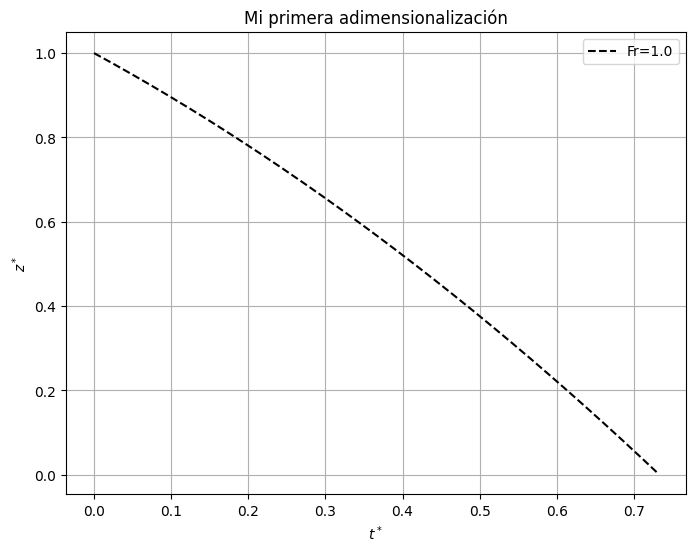

In [9]:
plt.figure(1, figsize = (8,6))
plt.plot(tAdim, zAdim, "--k",label="Fr={:.1f}".format(Fr))
plt.ylabel("$z^*$")
plt.xlabel("$t^*$")
plt.title("Mi primera adimensionalización")
plt.grid()
plt.legend()

<div class="alert alert-block alert-warning">
<b> ¿Qué podríamos hacer para devolverle las dimensiones a nuestro resultados?.</b> ¡Muy fácil! Simplemente multiplicamos el vector de tiempo adimensional por el tiempo característico, y el vector de posición adimensional por la altura característica
</div> 

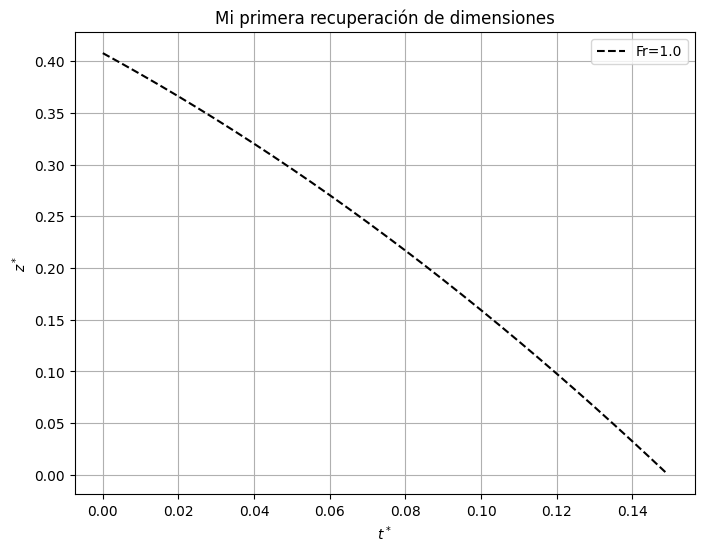

In [11]:
z = zc*zAdim
t = tc*tAdim

plt.figure(2, figsize = (8,6))
#Acá debe poner una línea para plotear
plt.ylabel("$z^*$")
plt.xlabel("$t^*$")
plt.title("Mi primera recuperación de dimensiones")
plt.grid()
plt.legend()

<div class="alert alert-block alert-warning">
<b> ¿Podemos comprobar la veracidad de dicho resultado?</b> ¡Claro que sí! Usando la ecuación de movimiento parabólico:
</div> 

$$
z_f = z_0 + w_0t + 0.5gt^2
$$

In [13]:
tf = 0.149
print(zc - 2*tf - 0.5*9.81*tf**2)

0.0008512917380224111


<div class="alert alert-block alert-warning">
<b> Estudiemos la versatilidad de los números adimensionales</b> Supongamos que únicamente tenemos la gráfica anterior, para $Fr = 1.0$. Ahora nos piden que encontremos el tiempo que tardaría el balón en tocar el suelo cuando es lanzado hacia abajo desde una altura de $1.0~m$ con velocidad inicial $3.1321~m/s$ ¿Qué deberíamos hacer?
</div> 

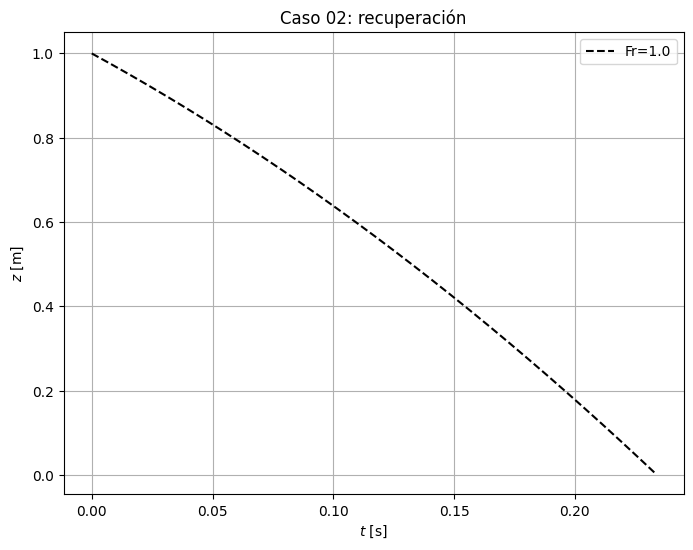

In [14]:
z2 = 1.0*zAdim
t2 = 1.0/3.1321*tAdim



<div class="alert alert-block alert-warning">
<b> ¿Eso es todo lo que nos puede ofrecer la adimensionalización del ecuaciones diferenciales?</b> Podemos sacar unas cuantas curvas para diferentes números de Froude.
</div> 

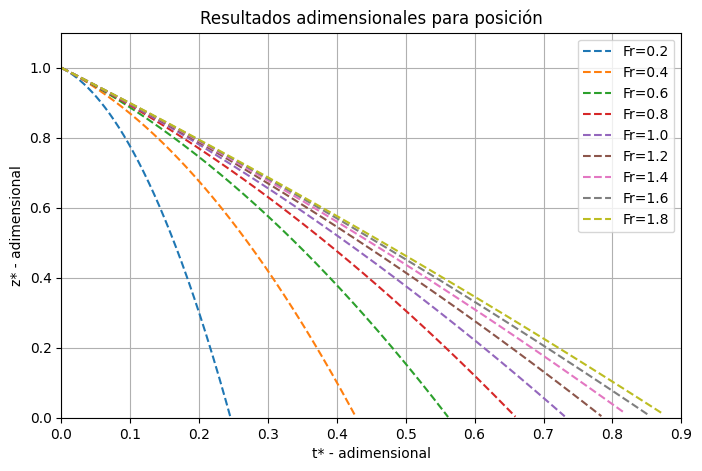